# 🕵️‍♂️ Credit Fraud Detection using QML 🚀

### 🌟 **Introduction**  
In this kernel, we’ll use predictive models to determine whether a transaction is **legitimate** or **fraudulent**. The dataset features are scaled and anonymized for privacy, but we can still extract valuable insights. Let’s begin!  

### 🎯 **Our Goals:**  
- ✔️ Understand the distribution of the provided (anonymized) data.  
- ✔️ Create a **balanced** 50/50 sub-dataset of Fraud vs. Non-Fraud transactions (using NearMiss Algorithm).  
- ✔️ Compare multiple classifiers and identify the most accurate one.  
- ✔️ Build a **Neural Network** and benchmark its performance against the best classifier.  

## 📚 **Outline:**  

- ### **I. Understanding Our Data**  
🔍 a) Gather Insights from the Data

- ### **II. Preprocessing**  
⚖️ a) Scaling and Distributing 

✂️ b) Splitting the Data 

- ### **III. Random Undersampling & Oversampling**  
📊 a) Distributing and Correlating

🛑 b) Anomaly Detection

🌀 c) Dimensionality Reduction (t-SNE) 

🤖 d) Classifiers  

📉 e) Logistic Regression Deep Dive 

🔄 f) Oversampling with SMOTE

- ### **IV. Testing**  
🧪 a) Logistic Regression Testing
  
🧠 b) Neural Networks (Undersampling vs. Oversampling) 

---

### 🚀 **Let’s dive into the data!**  

## 🔍 Gather Sense of Our Data
<a id="gather"></a>

First, let's understand the <b>basic characteristics</b> of our dataset. Note that except for <b>Time</b> and <b>Amount</b>, all other columns are anonymized (due to privacy concerns) and have been scaled through PCA transformations.

### 📊 Summary:
- 💰 The <b>average transaction amount</b> is relatively small: ~USD 88
- ✅ <b>No missing values</b> - we don't need to handle null data
- ⚖️ <b>Extreme class imbalance</b>:
  - Non-Fraud: 99.83% of transactions
  - Fraud: Only 0.17% of transactions

### ⚙️ Feature Technicalities:
- 🌀 <b>PCA Transformation</b>: 
  - All features (except Time and Amount) have undergone Principal Component Analysis
- ⚖️ <b>Scaling</b>:
  - PCA requires features to be scaled first
  - We assume the dataset creators properly scaled all V-features

In [1]:
import numpy as npe
import pandas as pd
import tensorflow as tf 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time
# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections
# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

#print dataset
df = pd.read_csv('./dataset/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [2]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [3]:
df.isnull().sum().max()

np.int64(0)

✅ <b>No missing values</b> - we don't need to handle null data

In [4]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [5]:
# The classes are heavily skewed we need to solve this issue later.
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


**Note:** 📢 Notice how imbalanced our original dataset is! ⚖️  

- **Majority Class:** Most of the transactions (💰) are **non-fraud**.  
- **Problem:** If we use this imbalanced dataset for predictive models, we might face:  
  - ❌ **High error rates** – Models may perform poorly on fraud detection.  
  - 🤖 **Overfitting** – Algorithms could "assume" most transactions are legit and ignore fraud patterns.  

🔍 **What We Want:**  
- Our model shouldn’t just *assume* – we want it to **detect subtle fraud signals**! 🕵️‍♂️  
- Proper handling (e.g., resampling, anomaly detection) is crucial for accurate fraud prediction. 🚀  

Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

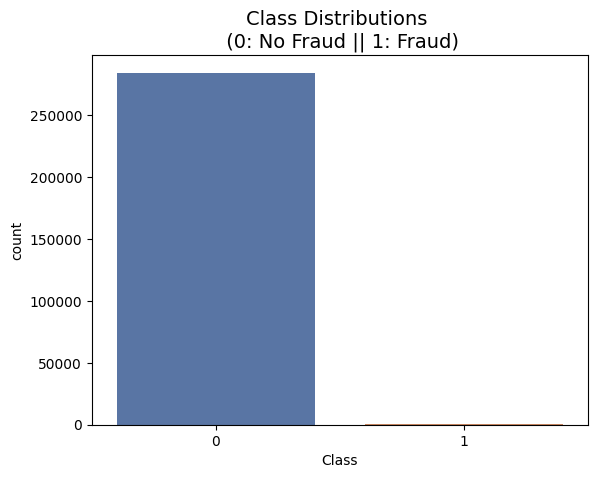

In [6]:
sns.countplot(x='Class', data=df, palette="deep")
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

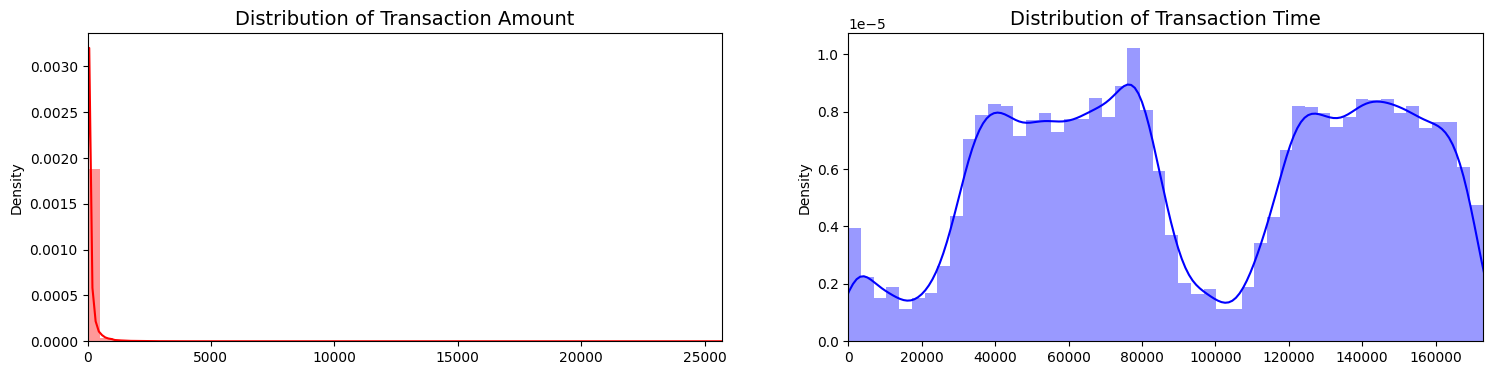

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))
amount_val = df['Amount'].values
time_val = df['Time'].values
sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])
sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])
plt.show()

## 📊 Scaling and Distributing  

<a id="distributing"></a>  

In this phase, we will:  
1. **Scale** the `Time` and `Amount` columns (like other features)  
2. Create a **balanced sub-sample** of fraud/non-fraud cases  

---

### 🔍 What is a Sub-Sample?  
A dataframe with:  
✔ **50/50 ratio** of Fraud/Non-Fraud  
✔ Same number of cases for each class  

---

- ### 📌 Implementation Steps  
1. **🔄 Scale Features**  
   - `scaled_amount` and `scaled_time` created  
   - Normalized like other columns  

2. **⚖️ Balance Classes**  
   - 492 fraud cases → randomly select 492 non-fraud  
   - Concatenate into new sub-sample  

3. **🎯 Result**  
   - Clean, balanced dataset for proper training  


In [8]:
# StandardScaler - Standardizes features by removing mean and scaling to unit variance
# RobustScaler - Scales features using statistics robust to outliers (uses median/IQR)

from sklearn.preprocessing import RobustScaler
# from sklearn.preprocessing import StandardScaler

# Initialize scaler objects
# We choose RobustScaler for these features because:
# - Transaction amounts may have extreme outliers
# - Time differences might have unusual patterns

#std_scaler = StandardScaler()  # Not used here, but shown for reference
rob_scaler = RobustScaler()    

# Scale the Amount column:
# - reshape(-1,1) converts to 2D array as required by sklearn
# - fit_transform calculates scaling params and applies in one step
# - creates new 'scaled_amount' column with normalized values
df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))

# Scale the Time column using same approach
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

# Remove original unscaled columns:
# - axis=1 specifies we're dropping columns (not rows)
# - inplace=True modifies the dataframe directly
df.drop(['Time','Amount'], axis=1, inplace=True)

In [9]:
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']
df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)
# Amount and Time are Scaled!
df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


### Splitting the Data (Original DataFrame)

In [10]:
from sklearn.model_selection import StratifiedKFold
import numpy as np

# Mostra distribuzione iniziale delle classi
print('[Distribuzione Classi nel Dataset]')
print(f'Non-Frodi: {df["Class"].value_counts()[0]/len(df)*100:.2f}%')
print(f'Frodi: {df["Class"].value_counts()[1]/len(df)*100:.2f}%')

# Prepara feature (X) e target (y)
X = df.drop('Class', axis=1)
y = df['Class']

# Inizializza StratifiedKFold con shuffle e random_state
sss = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Esegui i 5 fold
for fold_num, (train_index, test_index) in enumerate(sss.split(X, y), 1):
    print(f'\n[Fold {fold_num}]')

    # Estrai set di train e test
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

    # Converti in array NumPy
    original_Xtrain = original_Xtrain.values
    original_Xtest = original_Xtest.values
    original_ytrain = original_ytrain.values
    original_ytest = original_ytest.values

    # Controlla la distribuzione delle etichette
    train_labels, train_counts = np.unique(original_ytrain, return_counts=True)
    test_labels, test_counts = np.unique(original_ytest, return_counts=True)

    print('Distribuzione etichette (Train):')
    print(f'  Non-Frodi={train_counts[0]/len(original_ytrain):.4f}, Frodi={train_counts[1]/len(original_ytrain):.4f}')
    
    print('Distribuzione etichette (Test):')
    print(f'  Non-Frodi={test_counts[0]/len(original_ytest):.4f}, Frodi={test_counts[1]/len(original_ytest):.4f}')
    
    print(f'Sample count - Train: {len(original_Xtrain)}, Test: {len(original_Xtest)}')


[Distribuzione Classi nel Dataset]
Non-Frodi: 99.83%
Frodi: 0.17%

[Fold 1]
Distribuzione etichette (Train):
  Non-Frodi=0.9983, Frodi=0.0017
Distribuzione etichette (Test):
  Non-Frodi=0.9983, Frodi=0.0017
Sample count - Train: 227845, Test: 56962

[Fold 2]
Distribuzione etichette (Train):
  Non-Frodi=0.9983, Frodi=0.0017
Distribuzione etichette (Test):
  Non-Frodi=0.9983, Frodi=0.0017
Sample count - Train: 227845, Test: 56962

[Fold 3]
Distribuzione etichette (Train):
  Non-Frodi=0.9983, Frodi=0.0017
Distribuzione etichette (Test):
  Non-Frodi=0.9983, Frodi=0.0017
Sample count - Train: 227846, Test: 56961

[Fold 4]
Distribuzione etichette (Train):
  Non-Frodi=0.9983, Frodi=0.0017
Distribuzione etichette (Test):
  Non-Frodi=0.9983, Frodi=0.0017
Sample count - Train: 227846, Test: 56961

[Fold 5]
Distribuzione etichette (Train):
  Non-Frodi=0.9983, Frodi=0.0017
Distribuzione etichette (Test):
  Non-Frodi=0.9983, Frodi=0.0017
Sample count - Train: 227846, Test: 56961


### 🔄 Random Under-Sampling for Class Imbalance
Random Under-Sampling is a technique to address **class imbalance** by reducing the majority class to match the minority class size. In fraud detection (where fraud cases are typically <1%), this creates a balanced 50/50 distribution for more effective model training.

In [11]:
# Since our classes are highly skewed we should make them equivalent in order to have a normal distribution of the classes.
# Lets shuffle the data before creating the subsamples
df = df.sample(frac=1)
# amount of fraud classes 492 rows.
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]
normal_distributed_df = pd.concat([fraud_df, non_fraud_df])
# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)
new_df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
245233,0.162789,0.798470,-0.311234,0.997204,0.304375,1.078816,-0.069643,-0.560894,0.765067,-0.347820,...,0.085797,-0.163807,-0.176210,-0.043542,0.075223,-1.020332,0.550777,-0.646080,-0.338666,0
17317,1.089779,-0.658690,-27.848181,15.598193,-28.923756,6.418442,-20.346228,-4.828202,-19.210896,18.329406,...,1.697856,1.802149,-2.062934,-1.269843,0.165409,1.999499,-0.211059,1.324809,0.388090,1
224868,0.642772,0.696801,1.930321,-0.099410,-2.112190,0.070807,0.853817,0.074166,0.106588,-0.060797,...,0.087191,-0.201174,-0.439086,0.038898,-0.283132,0.054355,-0.093272,-0.015100,-0.020683,0
74794,4.051003,-0.339901,-6.003422,-3.930731,-0.007045,1.714669,3.414667,-2.329583,-1.901512,-2.746111,...,-4.128186,1.101671,-0.992494,-0.698259,0.139898,-0.205151,-0.472412,1.775378,-0.104285,1
76555,1.836931,-0.329750,-7.901421,2.720472,-7.885936,6.348334,-5.480119,-0.333059,-8.682376,1.164431,...,-0.614719,0.077739,1.092437,0.320133,-0.434643,-0.380687,0.213630,0.423620,-0.105169,1


##  Equally Distributing and Correlating: 
<a id="correlating"></a>
Now that we have our dataframe correctly balanced, we can go further with our <b>analysis</b> and <b>data preprocessing</b>.

Distribution of the Classes in the subsample dataset
Class
0    0.5
1    0.5
Name: count, dtype: float64


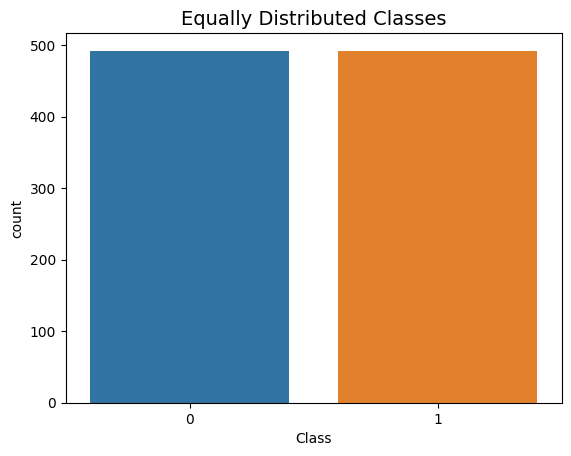

In [12]:
colors = ['#1f77b4', '#ff7f0e']  # Example: blue for class 0, orange for class 1
print('Distribution of the Classes in the subsample dataset')
print(new_df['Class'].value_counts()/len(new_df))
sns.countplot(x='Class', data=new_df, palette=colors)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

### 🔍 Correlation Matrices: Understanding Feature Relationships

- 🎯 Purpose
Correlation matrices help us identify which features strongly influence fraud detection. Using our **balanced subsample** is crucial - the original imbalanced data would distort these relationships.

- 📊 Key Insights from Correlation Analysis

    -🔻 Strong Negative Correlations (Higher values = Less likely fraud)
    - **V17**: Highest negative correlation  
    - **V14**: Clear separation between fraud/non-fraud  
    - **V12**: Notable pattern with transaction amounts  
    - **V10**: Important secondary indicator  

*Interpretation*: When these values are **lower**, the transaction is more likely to be fraudulent.

- 🔺 Strong Positive Correlations (Higher values = More likely fraud)  
  - **V11**: Most significant positive indicator  
  - **V4**: Strong pattern with digital transactions  
  - **V2**: Moderate correlation  
  - **V19**: Secondary positive indicator  

*Interpretation*: These features increase with fraudulent activity.

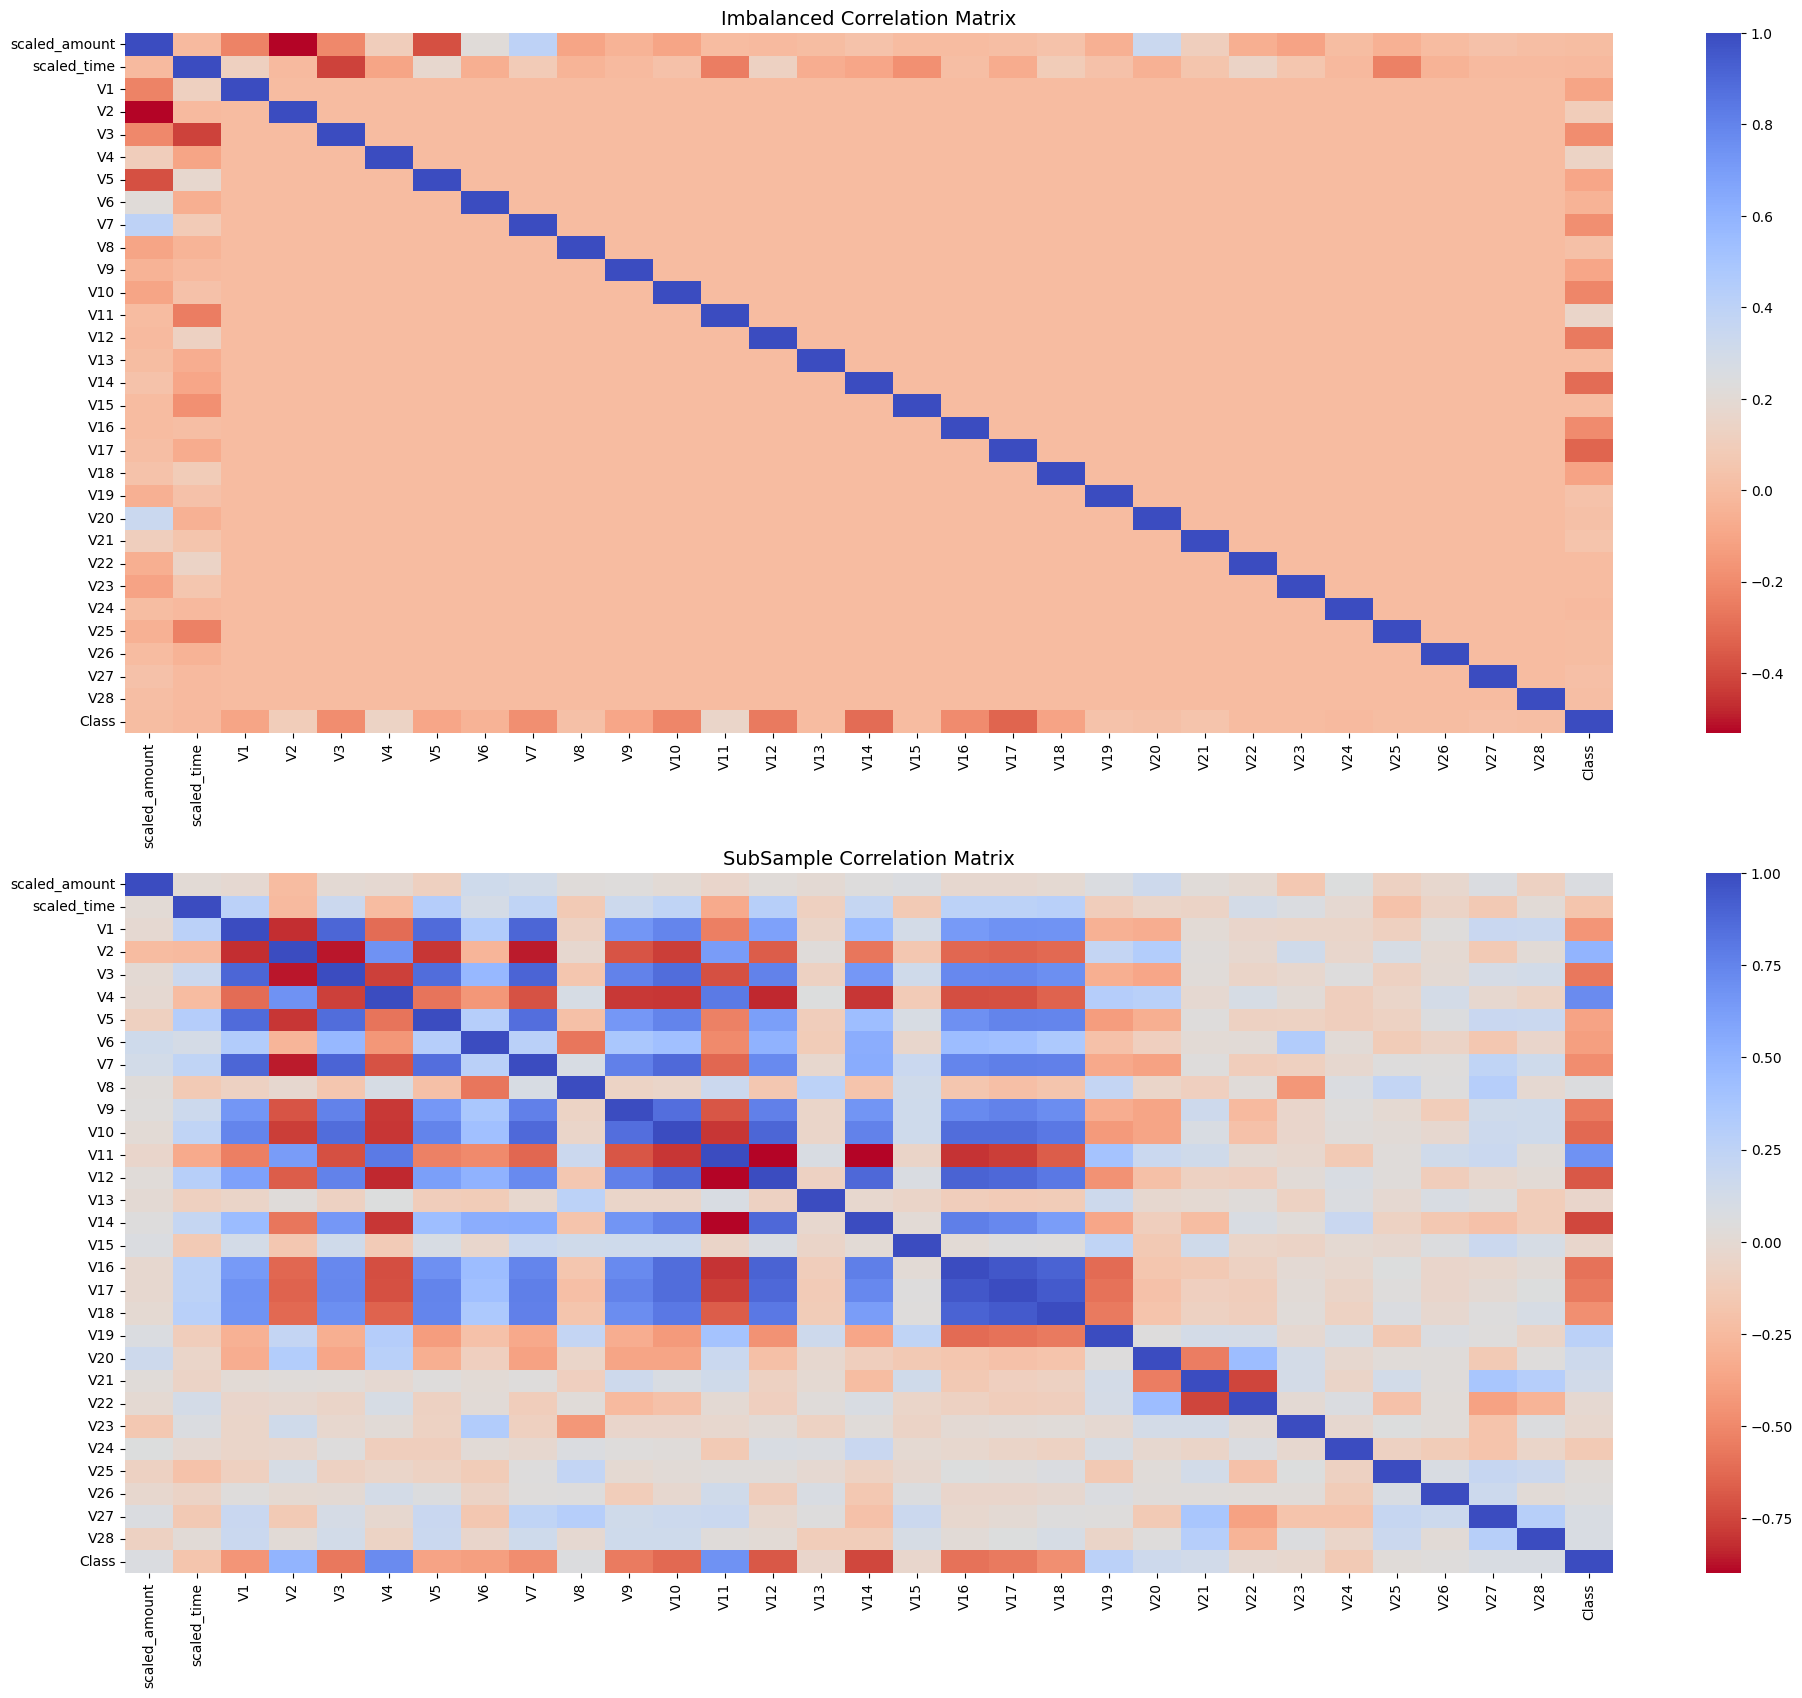

In [13]:
# Make sure we use the subsample in our correlation

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))

# Entire DataFrame
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix", fontsize=14)


sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title('SubSample Correlation Matrix', fontsize=14)
plt.show()

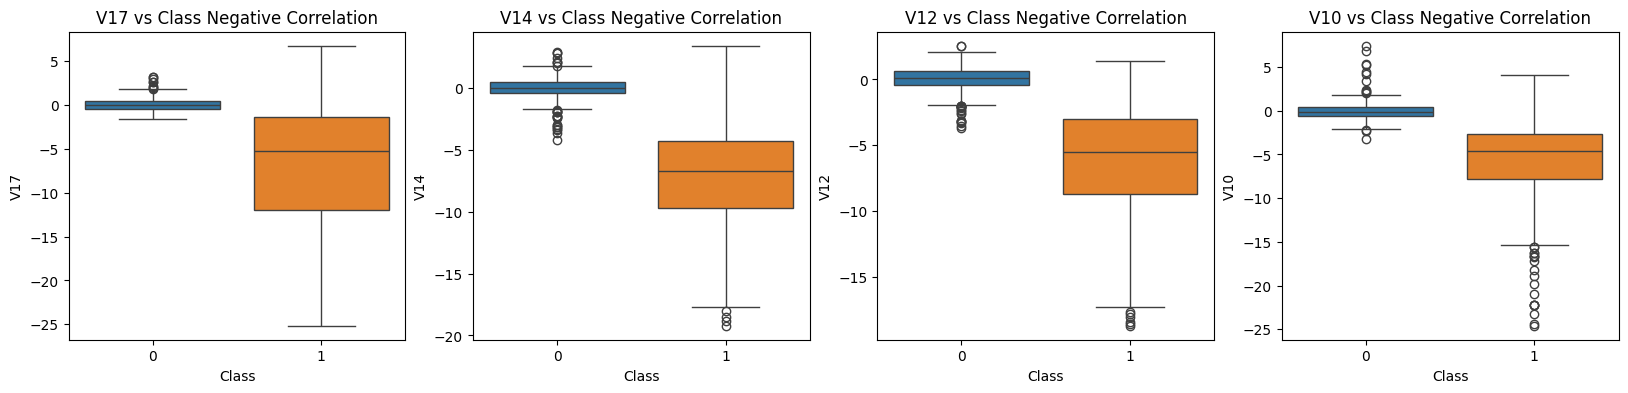

In [14]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))
# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
sns.boxplot(x="Class", y="V17", data=new_df, palette=colors, ax=axes[0])
axes[0].set_title('V17 vs Class Negative Correlation')
sns.boxplot(x="Class", y="V14", data=new_df, palette=colors, ax=axes[1])
axes[1].set_title('V14 vs Class Negative Correlation')
sns.boxplot(x="Class", y="V12", data=new_df, palette=colors, ax=axes[2])
axes[2].set_title('V12 vs Class Negative Correlation')
sns.boxplot(x="Class", y="V10", data=new_df, palette=colors, ax=axes[3])
axes[3].set_title('V10 vs Class Negative Correlation')
plt.show()

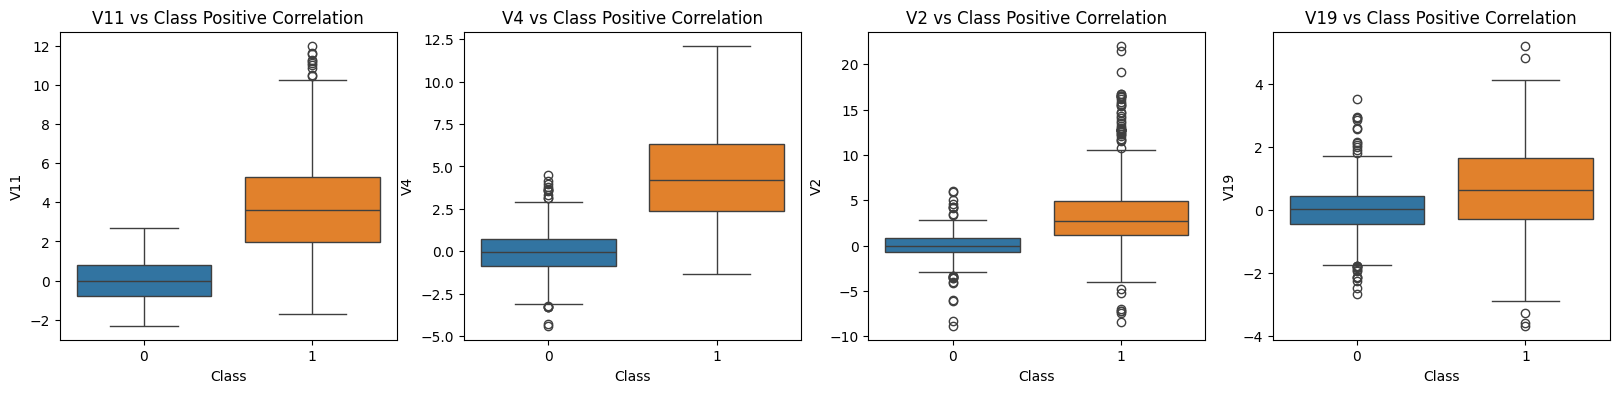

In [15]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))
# Positive correlations (The higher the feature the probability increases that it will be a fraud transaction)
sns.boxplot(x="Class", y="V11", data=new_df, palette=colors, ax=axes[0])
axes[0].set_title('V11 vs Class Positive Correlation')
sns.boxplot(x="Class", y="V4", data=new_df, palette=colors, ax=axes[1])
axes[1].set_title('V4 vs Class Positive Correlation')
sns.boxplot(x="Class", y="V2", data=new_df, palette=colors, ax=axes[2])
axes[2].set_title('V2 vs Class Positive Correlation')
sns.boxplot(x="Class", y="V19", data=new_df, palette=colors, ax=axes[3])
axes[3].set_title('V19 vs Class Positive Correlation')
plt.show()

### **Anomaly Detection**

This section focuses on removing **extreme outliers** from features highly correlated with the target classes, aiming to improve model accuracy.

---

- ### 📊 Interquartile Range (IQR) Method

- **IQR** = Q3 − Q1 (75th percentile − 25th percentile)
- A value is considered an **extreme outlier** if it falls outside:
  - Q1 − (threshold × IQR)
  - Q3 + (threshold × IQR)

**Typical threshold:** 1.5  
Higher threshold → fewer outliers removed  
Lower threshold → more outliers removed

---

- ### ⚖️ Outlier Removal Tradeoff

- A low threshold removes more data, increasing the risk of **information loss**.
- Focus on removing only **extreme** outliers to avoid reducing model performance.
- Experiment with different thresholds to evaluate their impact on model accuracy.

---

- ### ✅ Process Overview

1. **Visualize distributions** of selected features  
   (e.g., V14 follows a Gaussian distribution, unlike V10 and V12).
2. **Calculate thresholds**:
   - Lower bound = Q1 − (threshold × IQR)
   - Upper bound = Q3 + (threshold × IQR)
3. **Filter data**: remove values beyond both thresholds.
4. **Use boxplots** to confirm that extreme outliers have been reduced.

---

- ### 📈 Results

- Outlier removal improved accuracy by **over 3%**.
- Be cautious: too much filtering can cause **underfitting** by discarding valuable data.


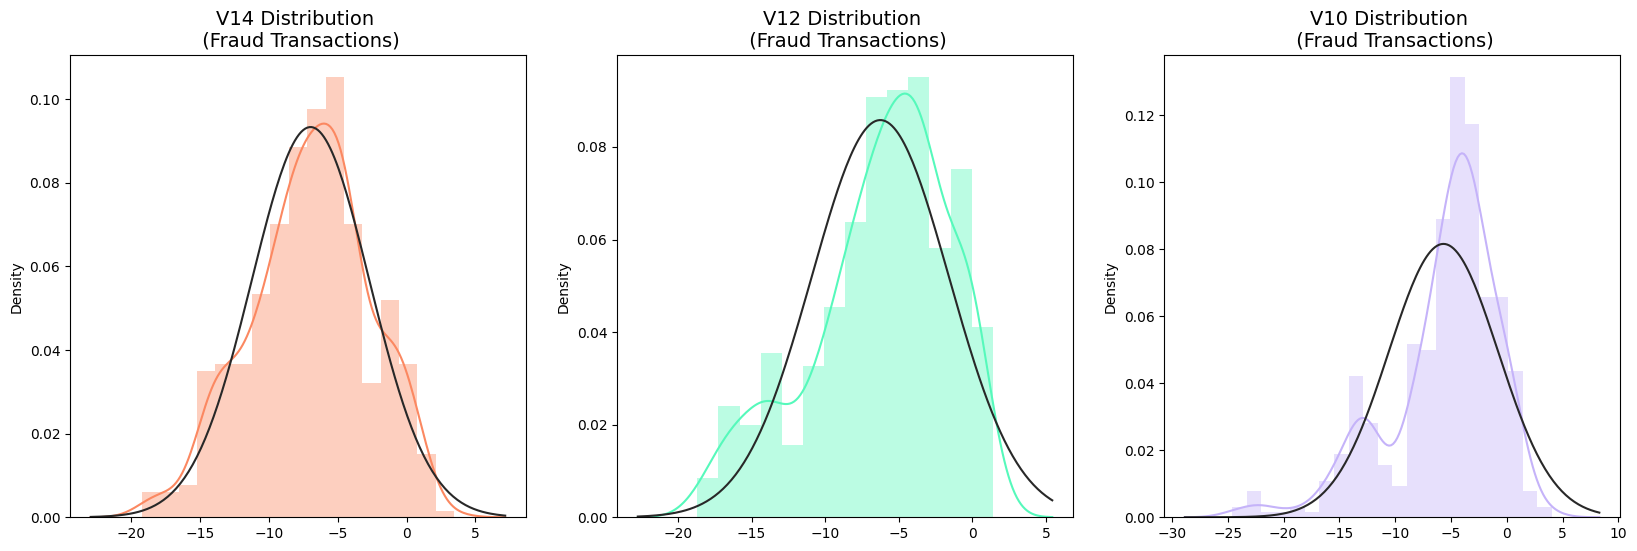

In [16]:
from scipy.stats import norm
f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20, 6))
v14_fraud_dist = new_df['V14'].loc[new_df['Class'] == 1].values
sns.distplot(v14_fraud_dist,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('V14 Distribution \n (Fraud Transactions)', fontsize=14)
v12_fraud_dist = new_df['V12'].loc[new_df['Class'] == 1].values
sns.distplot(v12_fraud_dist,ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('V12 Distribution \n (Fraud Transactions)', fontsize=14)
v10_fraud_dist = new_df['V10'].loc[new_df['Class'] == 1].values
sns.distplot(v10_fraud_dist,ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('V10 Distribution \n (Fraud Transactions)', fontsize=14)
plt.show()

In [17]:
# -----> V14 Removing Outliers (Highest Negative Correlated with Labels)
# Extracting V14 values for fraud cases and computing the IQR
v14_fraud = new_df['V14'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v14_fraud, 25), np.percentile(v14_fraud, 75)
v14_iqr = q75 - q25
# Calculating lower and upper bounds for outlier removal
v14_cut_off = v14_iqr * 1.5
v14_lower, v14_upper = q25 - v14_cut_off, q75 + v14_cut_off
# Identifying and removing outliers in V14 for fraud cases
outliers = [x for x in v14_fraud if x < v14_lower or x > v14_upper]
new_df = new_df.drop(new_df[(new_df['V14'] > v14_upper) | (new_df['V14'] < v14_lower)].index)
# -----> V12 Removing Outliers from Fraud Transactions
# Repeating the IQR-based method for feature V12
v12_fraud = new_df['V12'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v12_fraud, 25), np.percentile(v12_fraud, 75)
v12_iqr = q75 - q25
v12_cut_off = v12_iqr * 1.5
v12_lower, v12_upper = q25 - v12_cut_off, q75 + v12_cut_off
# Identifying and removing outliers in V12 for fraud cases
outliers = [x for x in v12_fraud if x < v12_lower or x > v12_upper]
new_df = new_df.drop(new_df[(new_df['V12'] > v12_upper) | (new_df['V12'] < v12_lower)].index)
# -----> V10 Removing Outliers
# Applying the same outlier removal strategy for feature V10
v10_fraud = new_df['V10'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v10_fraud, 25), np.percentile(v10_fraud, 75)
v10_iqr = q75 - q25
v10_cut_off = v10_iqr * 1.5
v10_lower, v10_upper = q25 - v10_cut_off, q75 + v10_cut_off
# Identifying and removing outliers in V10 for fraud cases
outliers = [x for x in v10_fraud if x < v10_lower or x > v10_upper]
new_df = new_df.drop(new_df[(new_df['V10'] > v10_upper) | (new_df['V10'] < v10_lower)].index)

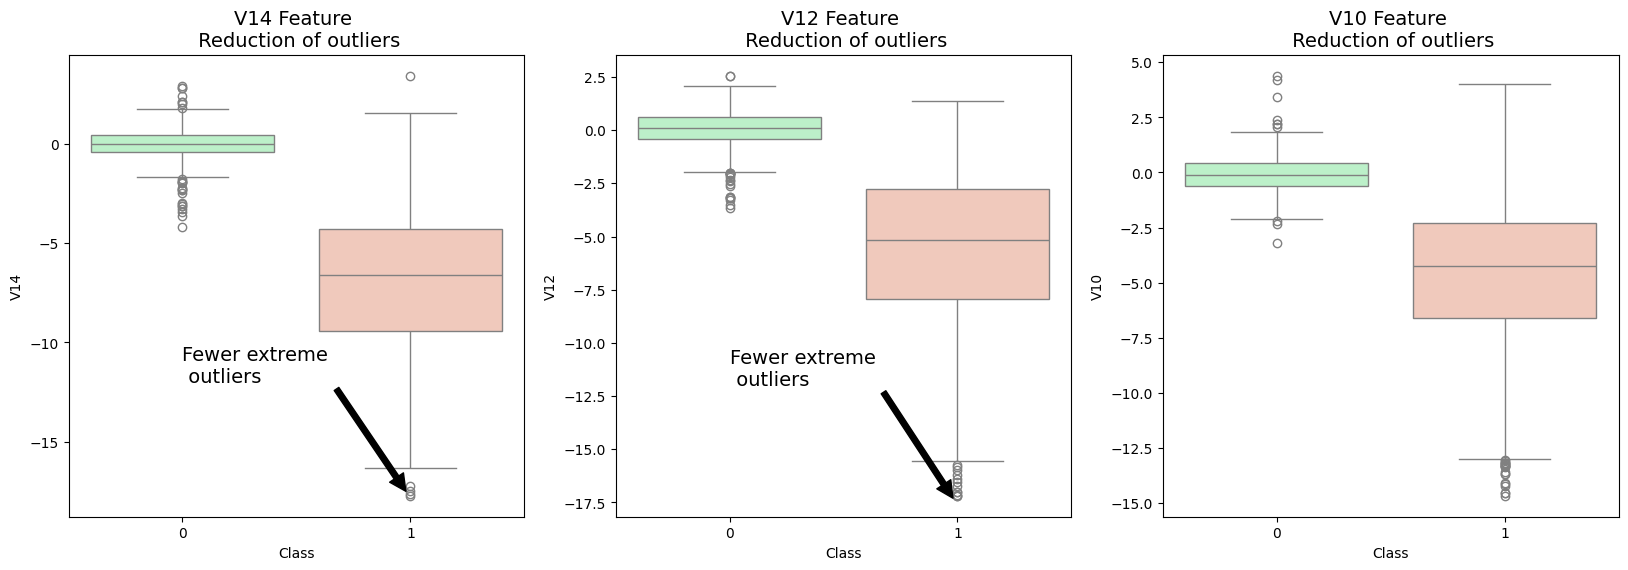

In [18]:
# Create a figure with 3 subplots side by side
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))
# Define custom colors for fraud and non-fraud classes
colors = ['#B3F9C5', '#f9c5b3']
# -----> Boxplot for V14 Feature
# Plotting V14 after outlier removal
sns.boxplot(x="Class", y="V14", data=new_df, ax=ax1, palette=colors)
ax1.set_title("V14 Feature \n Reduction of outliers", fontsize=14)
# Adding annotation to highlight reduction of outliers
ax1.annotate('Fewer extreme \n outliers', xy=(0.98, -17.5), xytext=(0, -12),
             arrowprops=dict(facecolor='black'), fontsize=14)
# -----> Boxplot for V12 Feature
# Plotting V12 after outlier removal
sns.boxplot(x="Class", y="V12", data=new_df, ax=ax2, palette=colors)
ax2.set_title("V12 Feature \n Reduction of outliers", fontsize=14)
# Annotation to show the effect of outlier reduction
ax2.annotate('Fewer extreme \n outliers', xy=(0.98, -17.3), xytext=(0, -12),
             arrowprops=dict(facecolor='black'), fontsize=14)
# -----> Boxplot for V10 Feature
# Plotting V10 after outlier removal
sns.boxplot(x="Class", y="V10", data=new_df, ax=ax3, palette=colors)
ax3.set_title("V10 Feature \n Reduction of outliers", fontsize=14)
# Annotation showing outlier reduction impact
ax3.annotate('Fewer extreme \n outliers', xy=(0.95, -16.5), xytext=(0, -12),
             arrowprops=dict(facecolor='black'), fontsize=14)
# Display all plots
plt.show()

We'll use the new dataframe for our QML in the other notebook!

In [19]:
#write the new dataframe to a csv file
new_df.to_csv('./dataset/creditcard_subsample.csv', index=False)

----------------------------------------------------------------------------------------

### Dimensionality Reduction & Clustering

- **🧠 t-SNE**
  - The **t-SNE algorithm** effectively clusters **fraud** and **non-fraud** cases in the dataset.
  - Despite using a small subsample (with shuffling), t-SNE consistently identifies clear clusters.
  - These results suggest that future **predictive models** will likely perform well in distinguishing fraudulent transactions.

In [20]:
# New_df is from the random undersample data (fewer instances)
X = new_df.drop('Class', axis=1)
y = new_df['Class']
# T-SNE Implementation
t0 = time.time()
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("T-SNE took {:.2} s".format(t1 - t0))
# PCA Implementation
t0 = time.time()
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("PCA took {:.2} s".format(t1 - t0))
# TruncatedSVD
t0 = time.time()
X_reduced_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42).fit_transform(X.values)
t1 = time.time()
print("Truncated SVD took {:.2} s".format(t1 - t0))

T-SNE took 2.9 s
PCA took 0.001 s
Truncated SVD took 0.0022 s


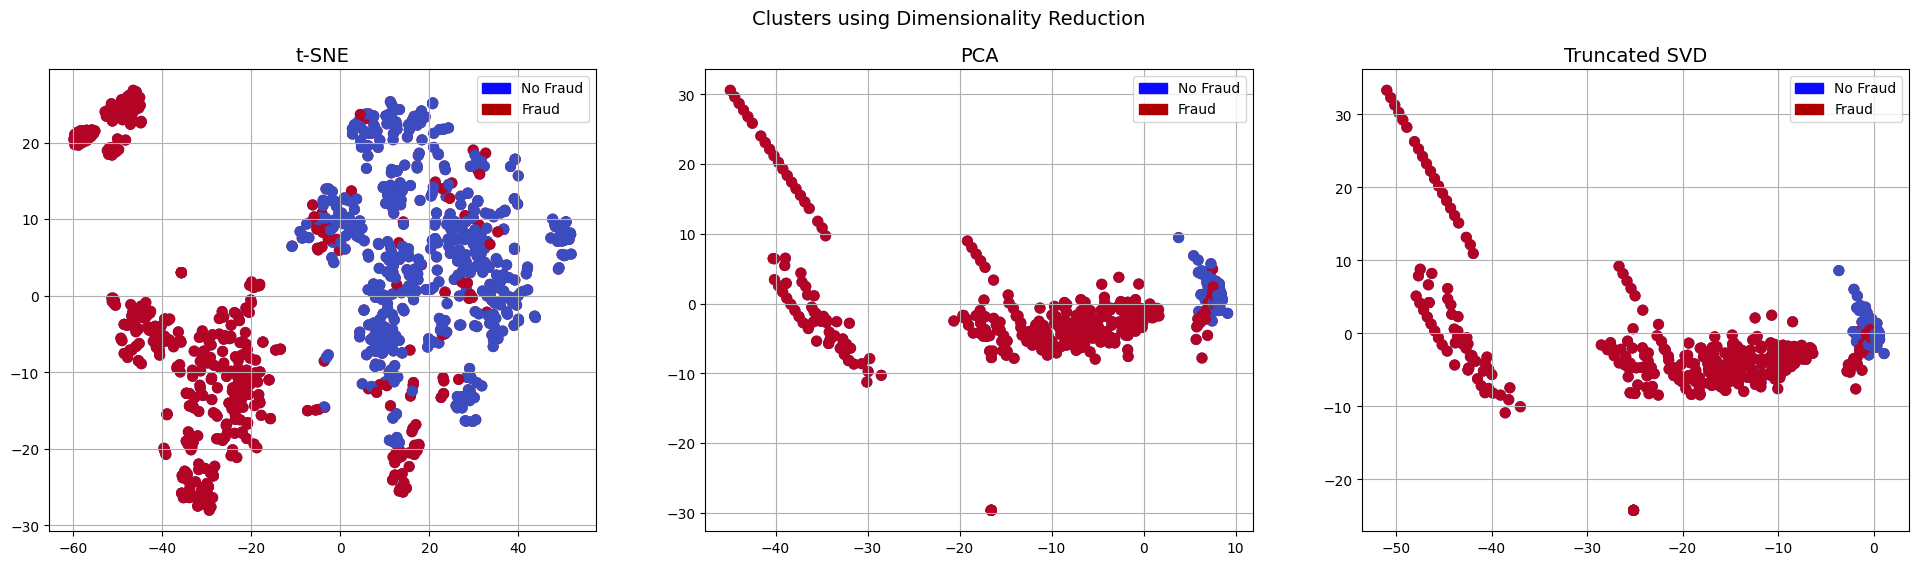

In [21]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6))
# labels = ['No Fraud', 'Fraud']
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)
blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')
# t-SNE scatter plot
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)
ax1.grid(True)
ax1.legend(handles=[blue_patch, red_patch])
# PCA scatter plot
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax2.set_title('PCA', fontsize=14)
ax2.grid(True)
ax2.legend(handles=[blue_patch, red_patch])
# TruncatedSVD scatter plot
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax3.set_title('Truncated SVD', fontsize=14)
ax3.grid(True)
ax3.legend(handles=[blue_patch, red_patch])
plt.show()

## Classifiers - Classical ML (UnderSampling)

In this section, we train four different classifiers to determine which one is most effective at detecting **fraudulent transactions**.  
Before training, we split the data into training and testing sets and separate features from labels.

---

### 📌 Summary

- **Logistic Regression** outperforms the other classifiers in most cases and will be analyzed further.
- **GridSearchCV** is used to find the optimal hyperparameters for each model.
- Logistic Regression achieves the best **ROC (Receiver Operating Characteristic) score**, meaning it effectively distinguishes between **fraud** and **non-fraud** transactions.

---

### 📉 Learning Curves

- A **large gap** between training and validation scores suggests **overfitting** (high variance).
- **Low scores** on both sets indicate **underfitting** (high bias).
- **Logistic Regression** shows strong performance on both training and validation sets, suggesting good generalization.

In [22]:
# Undersampling before cross validating (prone to overfit)
X = new_df.drop('Class', axis=1)
y = new_df['Class']

In [23]:
# Our data is already scaled we should split our training and test sets
from sklearn.model_selection import train_test_split
# This is explicitly used for undersampling.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# Turn the values into an array for feeding the classification algorithms.
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [25]:
# Let's implement simple classifiers
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

In [26]:
# Wow our scores are getting even high scores even when applying cross validation.
from sklearn.model_selection import cross_val_score

for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  LogisticRegression Has a training score of 93.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 93.0 % accuracy score
Classifiers:  SVC Has a training score of 93.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 89.0 % accuracy score


In [27]:
# Use GridSearchCV to find the best parameters.
from sklearn.model_selection import GridSearchCV

# Logistic Regression 
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}


grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
# We automatically get the logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_

knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)
# KNears best estimator
knears_neighbors = grid_knears.best_estimator_

# Support Vector Classifier
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train, y_train)

# SVC best estimator
svc = grid_svc.best_estimator_

# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)

# tree best estimator
tree_clf = grid_tree.best_estimator_

In [28]:
# Overfitting Case

log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')

knears_score = cross_val_score(knears_neighbors, X_train, y_train, cv=5)
print('Knears Neighbors Cross Validation Score', round(knears_score.mean() * 100, 2).astype(str) + '%')

svc_score = cross_val_score(svc, X_train, y_train, cv=5)
print('Support Vector Classifier Cross Validation Score', round(svc_score.mean() * 100, 2).astype(str) + '%')

tree_score = cross_val_score(tree_clf, X_train, y_train, cv=5)
print('DecisionTree Classifier Cross Validation Score', round(tree_score.mean() * 100, 2).astype(str) + '%')

Logistic Regression Cross Validation Score:  93.65%
Knears Neighbors Cross Validation Score 93.39%
Support Vector Classifier Cross Validation Score 92.99%
DecisionTree Classifier Cross Validation Score 91.93%


In [29]:
from sklearn.model_selection import StratifiedKFold
# We will undersample during cross validating
undersample_X = df.drop('Class', axis=1)
undersample_y = df['Class']

for train_index, test_index in sss.split(undersample_X, undersample_y):
    print("Train:", train_index, "Test:", test_index)
    undersample_Xtrain, undersample_Xtest = undersample_X.iloc[train_index], undersample_X.iloc[test_index]
    undersample_ytrain, undersample_ytest = undersample_y.iloc[train_index], undersample_y.iloc[test_index]
    
undersample_Xtrain = undersample_Xtrain.values
undersample_Xtest = undersample_Xtest.values
undersample_ytrain = undersample_ytrain.values
undersample_ytest = undersample_ytest.values 

undersample_accuracy = []
undersample_precision = []
undersample_recall = []
undersample_f1 = []
undersample_auc = []

# Implementing NearMiss Technique 
# Distribution of NearMiss (Just to see how it distributes the labels we won't use these variables)
X_nearmiss, y_nearmiss = NearMiss().fit_resample(undersample_X.values, undersample_y.values)
print('NearMiss Label Distribution: {}'.format(Counter(y_nearmiss)))
# Cross Validating the right way

for train, test in sss.split(undersample_Xtrain, undersample_ytrain):
    undersample_pipeline = imbalanced_make_pipeline(NearMiss(sampling_strategy='majority'), log_reg) # SMOTE happens during Cross Validation not before..
    undersample_model = undersample_pipeline.fit(undersample_Xtrain[train], undersample_ytrain[train])
    undersample_prediction = undersample_model.predict(undersample_Xtrain[test])
    undersample_accuracy.append(undersample_pipeline.score(original_Xtrain[test], original_ytrain[test]))
    undersample_precision.append(precision_score(original_ytrain[test], undersample_prediction))
    undersample_recall.append(recall_score(original_ytrain[test], undersample_prediction))
    undersample_f1.append(f1_score(original_ytrain[test], undersample_prediction))
    undersample_auc.append(roc_auc_score(original_ytrain[test], undersample_prediction))

Train: [     0      1      2 ... 284804 284805 284806] Test: [     5      7      9 ... 284778 284793 284799]
Train: [     0      3      4 ... 284804 284805 284806] Test: [     1      2     13 ... 284792 284797 284801]
Train: [     1      2      5 ... 284800 284801 284803] Test: [     0      3      4 ... 284804 284805 284806]
Train: [     0      1      2 ... 284804 284805 284806] Test: [    14     19     27 ... 284795 284796 284800]
Train: [     0      1      2 ... 284804 284805 284806] Test: [    11     15     22 ... 284791 284794 284803]
NearMiss Label Distribution: Counter({np.int64(0): 492, np.int64(1): 492})


In [30]:
# Import required functions from scikit-learn
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

# Define a function to plot learning curves for four different estimators
def plot_learning_curve(estimator1, estimator2, estimator3, estimator4, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):

    # Create a 2x2 grid of subplots to plot four learning curves
    f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 14), sharey=True)

    # Set y-axis limits if specified
    if ylim is not None:
        plt.ylim(*ylim)

    # === Learning Curve for Estimator 1 (e.g., Logistic Regression) ===
    # Generate learning curve data: training sizes, scores, and cross-validation scores
    train_sizes, train_scores, test_scores = learning_curve(
        estimator1, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)

    # Compute mean and standard deviation for training and validation scores
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plot training and validation score bands (± std) and average lines
    ax1.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="#ff9124")
    ax1.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax1.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124", label="Training score")
    ax1.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff", label="Cross-validation score")
    ax1.set_title("Logistic Regression Learning Curve", fontsize=14)
    ax1.set_xlabel('Training size (m)')
    ax1.set_ylabel('Score')
    ax1.grid(True)
    ax1.legend(loc="best")

    # === Learning Curve for Estimator 2 (e.g., K-Nearest Neighbors) ===
    train_sizes, train_scores, test_scores = learning_curve(
        estimator2, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    ax2.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="#ff9124")
    ax2.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax2.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124", label="Training score")
    ax2.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff", label="Cross-validation score")
    ax2.set_title("K-Nearest Neighbors Learning Curve", fontsize=14)
    ax2.set_xlabel('Training size (m)')
    ax2.set_ylabel('Score')
    ax2.grid(True)
    ax2.legend(loc="best")

    # === Learning Curve for Estimator 3 (e.g., Support Vector Classifier) ===
    train_sizes, train_scores, test_scores = learning_curve(
        estimator3, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    ax3.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="#ff9124")
    ax3.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax3.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124", label="Training score")
    ax3.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff", label="Cross-validation score")
    ax3.set_title("Support Vector Classifier \n Learning Curve", fontsize=14)
    ax3.set_xlabel('Training size (m)')
    ax3.set_ylabel('Score')
    ax3.grid(True)
    ax3.legend(loc="best")

    # === Learning Curve for Estimator 4 (e.g., Decision Tree Classifier) ===
    train_sizes, train_scores, test_scores = learning_curve(
        estimator4, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    ax4.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="#ff9124")
    ax4.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax4.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124", label="Training score")
    ax4.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff", label="Cross-validation score")
    ax4.set_title("Decision Tree Classifier \n Learning Curve", fontsize=14)
    ax4.set_xlabel('Training size (m)')
    ax4.set_ylabel('Score')
    ax4.grid(True)
    ax4.legend(loc="best")

    # Return the complete matplotlib plot
    return plt

<module 'matplotlib.pyplot' from 'c:\\Users\\jacop\\Desktop\\Classificator_benchmark-QML\\env\\Lib\\site-packages\\matplotlib\\pyplot.py'>

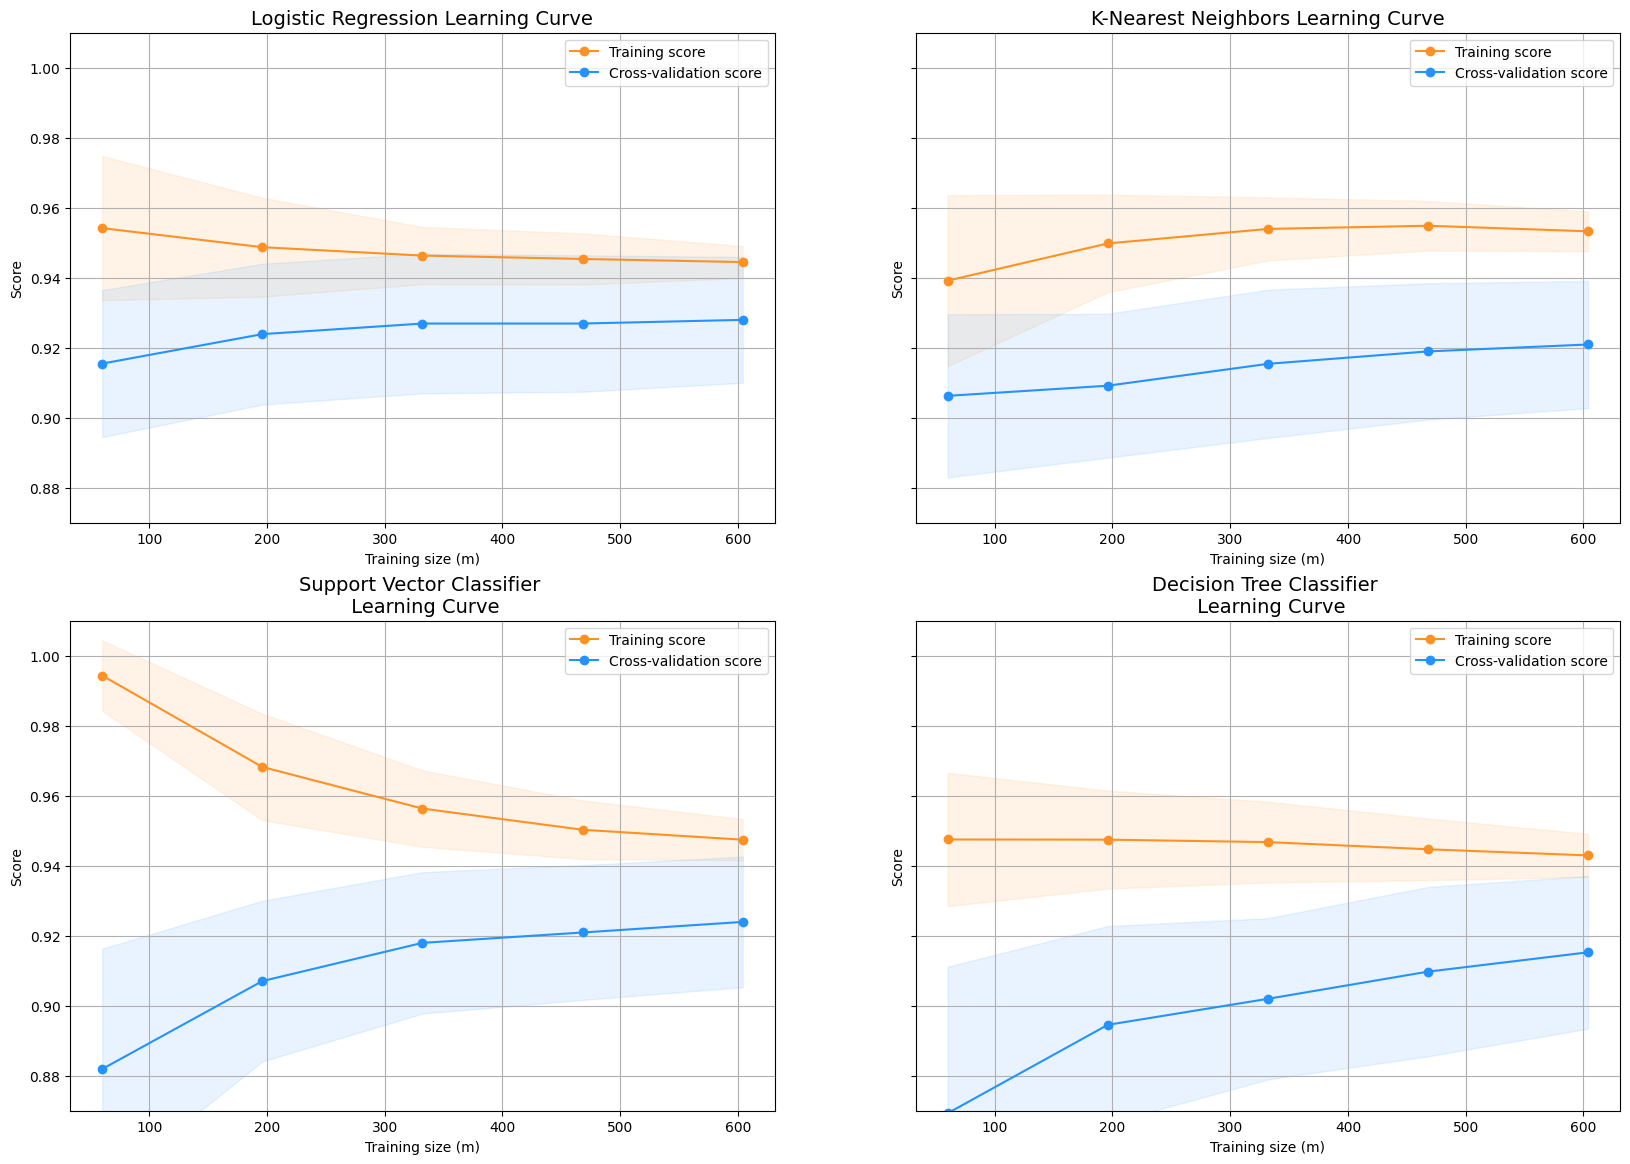

In [31]:
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=42)
plot_learning_curve(log_reg, knears_neighbors, svc, tree_clf, X_train, y_train, (0.87, 1.01), cv=cv, n_jobs=4)

In [32]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict
# Create a DataFrame with all the scores and the classifiers names.

log_reg_pred = cross_val_predict(log_reg, X_train, y_train, cv=5,
                             method="decision_function")

knears_pred = cross_val_predict(knears_neighbors, X_train, y_train, cv=5)

svc_pred = cross_val_predict(svc, X_train, y_train, cv=5,
                             method="decision_function")

tree_pred = cross_val_predict(tree_clf, X_train, y_train, cv=5)

In [33]:
from sklearn.metrics import roc_auc_score

print('Logistic Regression: ', roc_auc_score(y_train, log_reg_pred))
print('KNears Neighbors: ', roc_auc_score(y_train, knears_pred))
print('Support Vector Classifier: ', roc_auc_score(y_train, svc_pred))
print('Decision Tree Classifier: ', roc_auc_score(y_train, tree_pred))

Logistic Regression:  0.9760473588342442
KNears Neighbors:  0.9326187473728458
Support Vector Classifier:  0.9726565783942833
Decision Tree Classifier:  0.9182639764606978


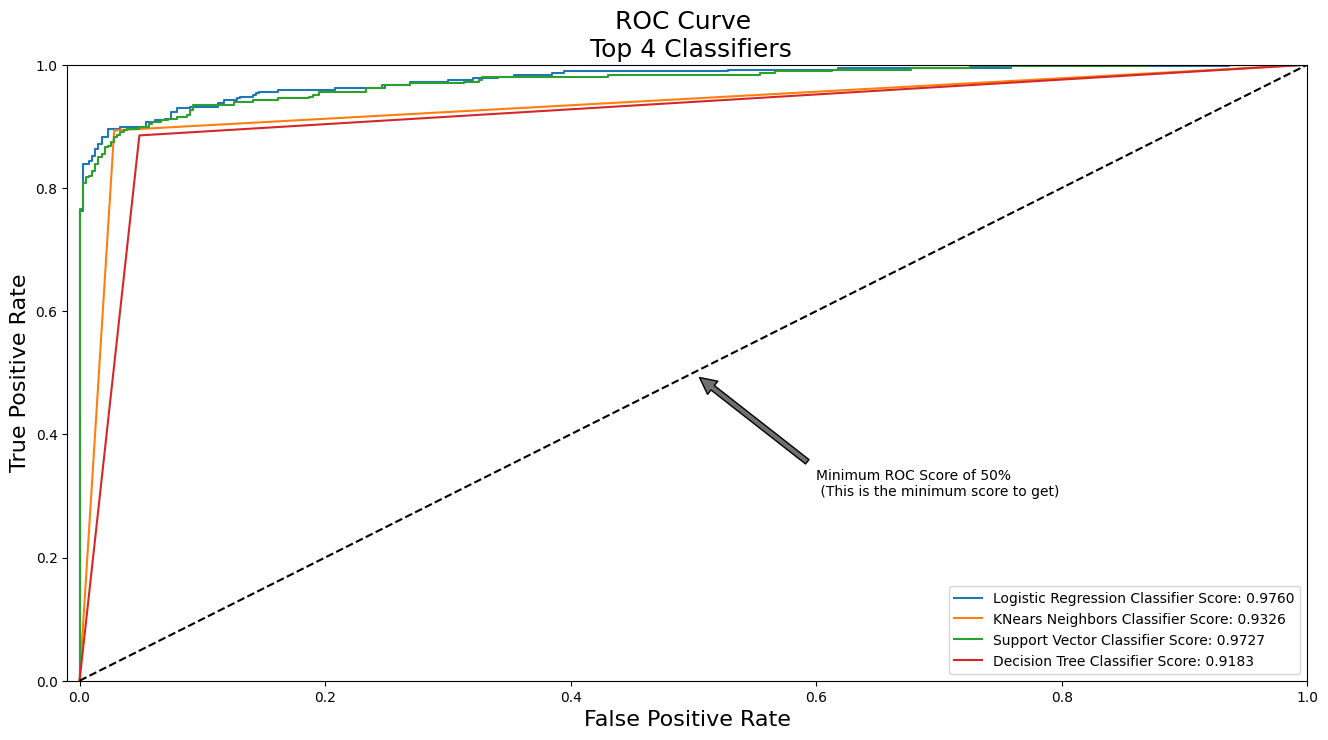

In [34]:
log_fpr, log_tpr, log_thresold = roc_curve(y_train, log_reg_pred)
knear_fpr, knear_tpr, knear_threshold = roc_curve(y_train, knears_pred)
svc_fpr, svc_tpr, svc_threshold = roc_curve(y_train, svc_pred)
tree_fpr, tree_tpr, tree_threshold = roc_curve(y_train, tree_pred)

def graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve \n Top 4 Classifiers', fontsize=18)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_train, log_reg_pred)))
    plt.plot(knear_fpr, knear_tpr, label='KNears Neighbors Classifier Score: {:.4f}'.format(roc_auc_score(y_train, knears_pred)))
    plt.plot(svc_fpr, svc_tpr, label='Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y_train, svc_pred)))
    plt.plot(tree_fpr, tree_tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_train, tree_pred)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr)
plt.show()

## 📈 A Deeper Look into Logistic Regression

In this section, we take a closer look at how the **Logistic Regression** classifier performs in terms of precision and recall when detecting fraud.

---

### 📊 Key Terms:
- **🎯 True Positives**: Correctly predicted fraud transactions  
- **⚠️ False Positives**: Predicted fraud, but actually non-fraud  
- **✅ True Negatives**: Correctly predicted non-fraud transactions  
- **❌ False Negatives**: Missed fraud cases (predicted non-fraud)

---

### 🧮 Metrics:
- **📌 Precision**:  
  `True Positives / (True Positives + False Positives)`  
  → Measures how *accurate* the model is when it predicts fraud.
  
- **📌 Recall**:  
  `True Positives / (True Positives + False Negatives)`  
  → Measures how many *actual* fraud cases the model captures.

- **⚖️ Precision vs Recall Tradeoff**:  
  A model with **high precision** is very selective — it only flags fraud when it's very confident.  
  However, this may lead to **missing more fraud cases** (lower recall).  
  Lowering the precision threshold can catch more fraud cases, but increases false positives.

---

### 📝 Summary:
- **📉 Precision starts to drop slightly** between 0.90 and 0.92, but remains high overall.
- **🔍 Recall stays decent**, showing the model is still effective at detecting fraud without too many false alarms.


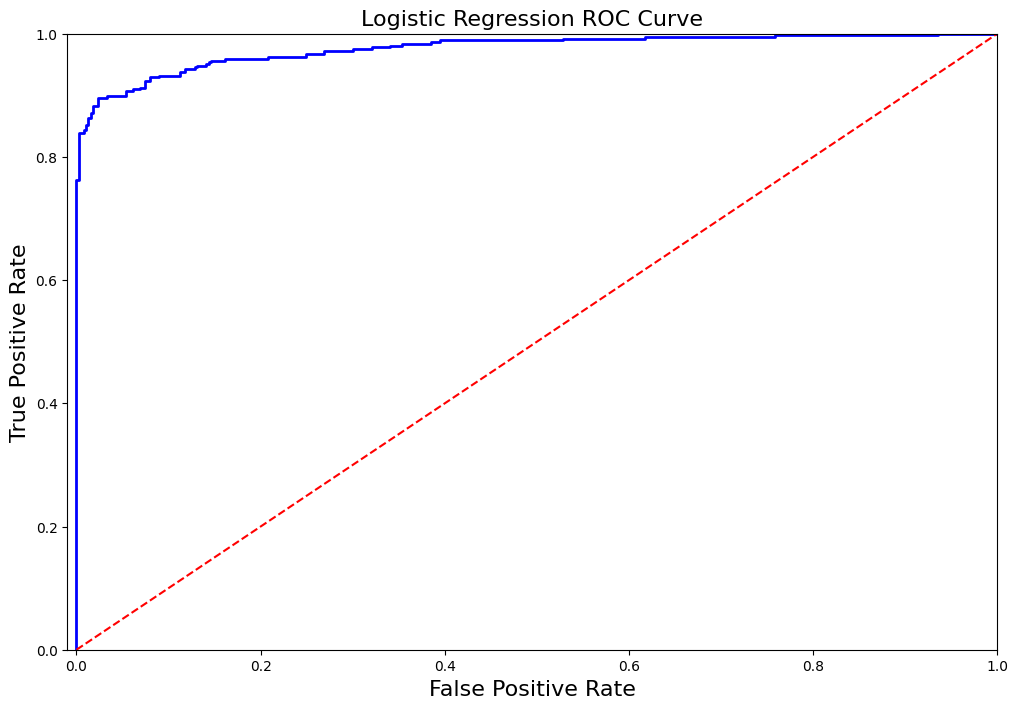

In [35]:
def logistic_roc_curve(log_fpr, log_tpr):
    plt.figure(figsize=(12,8))
    plt.title('Logistic Regression ROC Curve', fontsize=16)
    plt.plot(log_fpr, log_tpr, 'b-', linewidth=2)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.axis([-0.01,1,0,1])
    
    
logistic_roc_curve(log_fpr, log_tpr)
plt.show()

In [36]:
from sklearn.metrics import precision_recall_curve

precision, recall, threshold = precision_recall_curve(y_train, log_reg_pred)

In [37]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
y_pred = log_reg.predict(X_train)

# Overfitting Case
print('---' * 45)
print('Overfitting: \n')
print('Recall Score: {:.2f}'.format(recall_score(y_train, y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_train, y_pred)))
print('F1 Score: {:.2f}'.format(f1_score(y_train, y_pred)))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_train, y_pred)))
print('---' * 45)

# How it should look like
print('---' * 45)
print('How it should be:\n')
print("Accuracy Score: {:.2f}".format(np.mean(undersample_accuracy)))
print("Precision Score: {:.2f}".format(np.mean(undersample_precision)))
print("Recall Score: {:.2f}".format(np.mean(undersample_recall)))
print("F1 Score: {:.2f}".format(np.mean(undersample_f1)))
print('---' * 45)

---------------------------------------------------------------------------------------------------------------------------------------
Overfitting: 

Recall Score: 0.92
Precision Score: 0.70
F1 Score: 0.79
Accuracy Score: 0.77
---------------------------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------------------------
How it should be:

Accuracy Score: 0.70
Precision Score: 0.00
Recall Score: 0.26
F1 Score: 0.00
---------------------------------------------------------------------------------------------------------------------------------------


In [38]:
undersample_y_score = log_reg.decision_function(original_Xtest)

In [39]:
from sklearn.metrics import average_precision_score

undersample_average_precision = average_precision_score(original_ytest, undersample_y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      undersample_average_precision))

Average precision-recall score: 0.05


Text(0.5, 1.0, 'UnderSampling Precision-Recall curve: \n Average Precision-Recall Score =0.05')

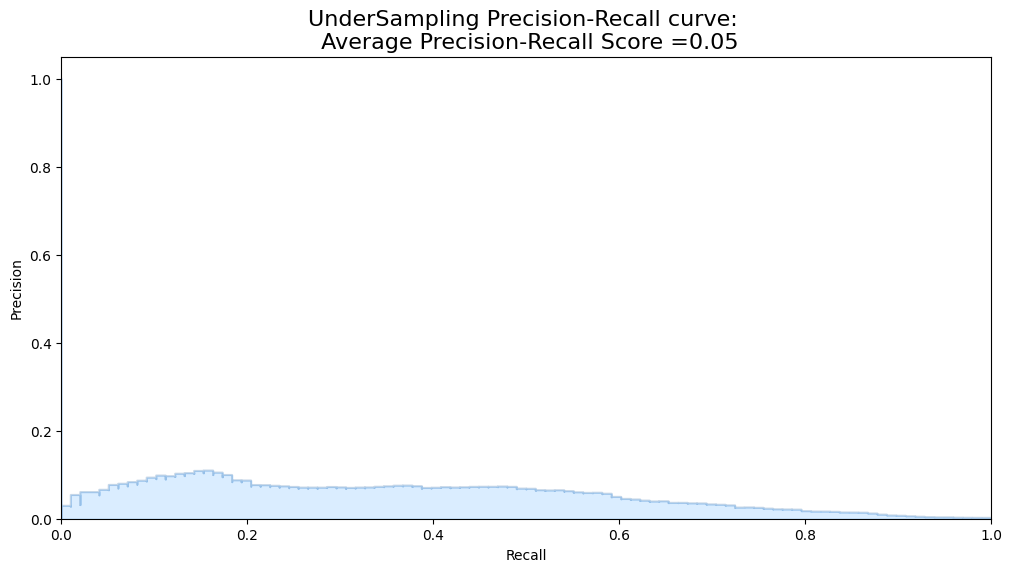

In [40]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,6))

precision, recall, _ = precision_recall_curve(original_ytest, undersample_y_score)

plt.step(recall, precision, color='#004a93', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='#48a6ff')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('UnderSampling Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(
          undersample_average_precision), fontsize=16)

## ⚖️ SMOTE Technique (Over-Sampling)

**SMOTE** (Synthetic Minority Over-sampling Technique) tackles class imbalance by generating synthetic samples for the minority class instead of removing data from the majority class.

### 🔍 Key Points:
- **🎯 Goal**: Balances classes by generating new, synthetic examples from the minority class.
- **🧬 How It Works**: Creates synthetic points between existing minority samples and their nearest neighbors.
- **💾 Advantage**: No information is lost, unlike with random undersampling.
- **⏱️ Tradeoff**: Often more accurate, but training takes longer due to the larger dataset size.

In [41]:
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
import numpy as np

# Define hyperparameter grid for Logistic Regression
log_reg_params = {
    "penalty": ['l1', 'l2'],  # Regularization types
    "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],  # Inverse of regularization strength
    "solver": ['liblinear']  # Solver that supports both 'l1' and 'l2'
}

# Initialize lists to collect evaluation metrics for each fold
accuracy_lst = []
precision_lst = []
recall_lst = []
f1_lst = []
auc_lst = []

# Loop through Stratified ShuffleSplit folds
for train, test in sss.split(original_Xtrain, original_ytrain):
    # Set up randomized hyperparameter search for Logistic Regression
    rand_log_reg = RandomizedSearchCV(LogisticRegression(), log_reg_params, n_iter=4, n_jobs=-1, cv=2)
    
    # Create a pipeline with SMOTE to handle class imbalance and Logistic Regression with hyperparameter tuning
    pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), rand_log_reg)
    
    # Fit the pipeline on the training split
    model = pipeline.fit(original_Xtrain[train], original_ytrain[train])
    
    # Extract the best estimator from the RandomizedSearchCV
    best_est = rand_log_reg.best_estimator_
    
    # Predict on the validation split
    prediction = best_est.predict(original_Xtrain[test])
    
    # Calculate and store evaluation metrics
    accuracy_lst.append(pipeline.score(original_Xtrain[test], original_ytrain[test]))
    precision_lst.append(precision_score(original_ytrain[test], prediction))
    recall_lst.append(recall_score(original_ytrain[test], prediction))
    f1_lst.append(f1_score(original_ytrain[test], prediction))
    auc_lst.append(roc_auc_score(original_ytrain[test], prediction))

# Print average metrics across all folds
print('---' * 45)
print("\naccuracy:  {:.4f}".format(np.mean(accuracy_lst)))
print("precision: {:.4f}".format(np.mean(precision_lst)))
print("recall:    {:.4f}".format(np.mean(recall_lst)))
print("f1:        {:.4f}".format(np.mean(f1_lst)))
print("auc:       {:.4f}".format(np.mean(auc_lst)))
print('---' * 45)


---------------------------------------------------------------------------------------------------------------------------------------

accuracy:  0.9778
precision: 0.0676
recall:    0.9188
f1:        0.1258
auc:       0.9483
---------------------------------------------------------------------------------------------------------------------------------------


In [42]:
labels = ['No Fraud', 'Fraud']
smote_prediction = best_est.predict(original_Xtest)
print(classification_report(original_ytest, smote_prediction, target_names=labels))

              precision    recall  f1-score   support

    No Fraud       1.00      0.98      0.99     56863
       Fraud       0.07      0.88      0.13        98

    accuracy                           0.98     56961
   macro avg       0.53      0.93      0.56     56961
weighted avg       1.00      0.98      0.99     56961



In [43]:
y_score = best_est.decision_function(original_Xtest)

In [44]:
average_precision = average_precision_score(original_ytest, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.74


Text(0.5, 1.0, 'OverSampling Precision-Recall curve: \n Average Precision-Recall Score =0.74')

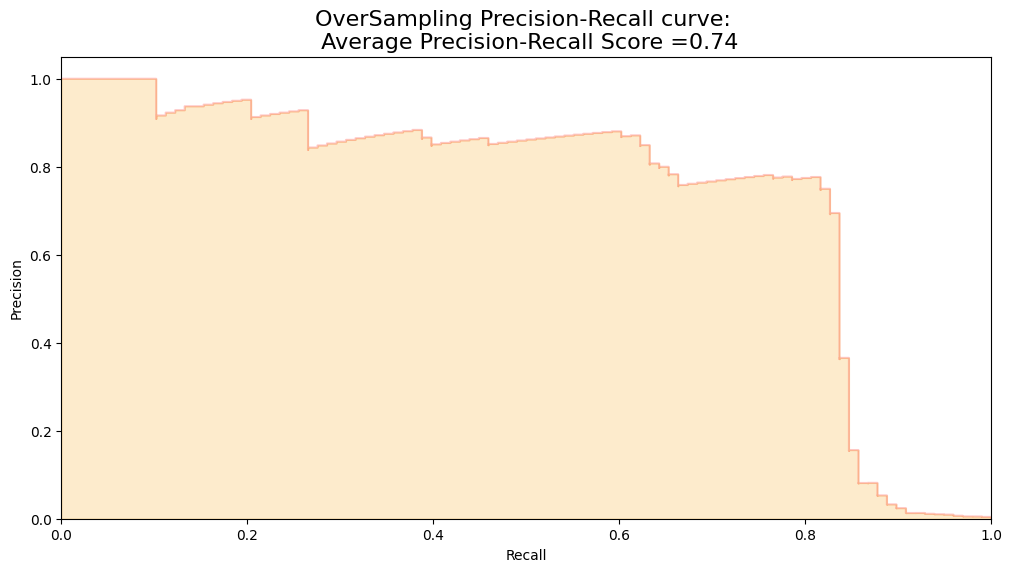

In [45]:
fig = plt.figure(figsize=(12,6))

precision, recall, _ = precision_recall_curve(original_ytest, y_score)

plt.step(recall, precision, color='r', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='#F59B00')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('OverSampling Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(
          average_precision), fontsize=16)

In [46]:
# SMOTE Technique (OverSampling) After splitting and Cross Validating
sm = SMOTE(sampling_strategy='minority', random_state=42)
# Xsm_train, ysm_train = sm.fit_sample(X_train, y_train)
Xsm_train, ysm_train = sm.fit_resample(original_Xtrain, original_ytrain)
# Write the new data to a csv file
smote_df = pd.DataFrame(Xsm_train, columns=X.columns)
smote_df['Class'] = ysm_train
smote_df.to_csv('./dataset/creditcard_smote.csv', index=False)


In [47]:
# We Improve the score by 2% points approximately 
# Implement GridSearchCV and the other models.

# Logistic Regression
t0 = time.time()
log_reg_sm = grid_log_reg.best_estimator_
log_reg_sm.fit(Xsm_train, ysm_train)
t1 = time.time()
print("Fitting oversample data took :{} sec".format(t1 - t0))

Fitting oversample data took :1.120734453201294 sec


## 🧪 Test Data with Logistic Regression

### 📊 Confusion Matrix Overview:
- **Positive/Negative**: Class labels — `"Yes"` (Fraud), `"No"` (No Fraud)
- **True/False**: Indicates whether the prediction was correct

### 🔍 Breakdown:
- **✅ True Negatives (Top-Left)**: Correctly predicted `"No"` (No Fraud)
- **❌ False Negatives (Top-Right)**: Incorrectly predicted `"No"` when it was actually `"Yes"` (Fraud missed)
- **⚠️ False Positives (Bottom-Left)**: Incorrectly predicted `"Yes"` when it was actually `"No"` (False alarm)
- **🎯 True Positives (Bottom-Right)**: Correctly predicted `"Yes"` (Fraud detected)

---

### 📝 Summary:
- **📉 Random Undersampling**: Evaluation is based on a reduced subset — **not** the original dataset.
- **🤖 Best Models**: The top-performing classifiers were:
  - `✔️ Logistic Regression`
  - `✔️ Support Vector Classifier (SVM)`


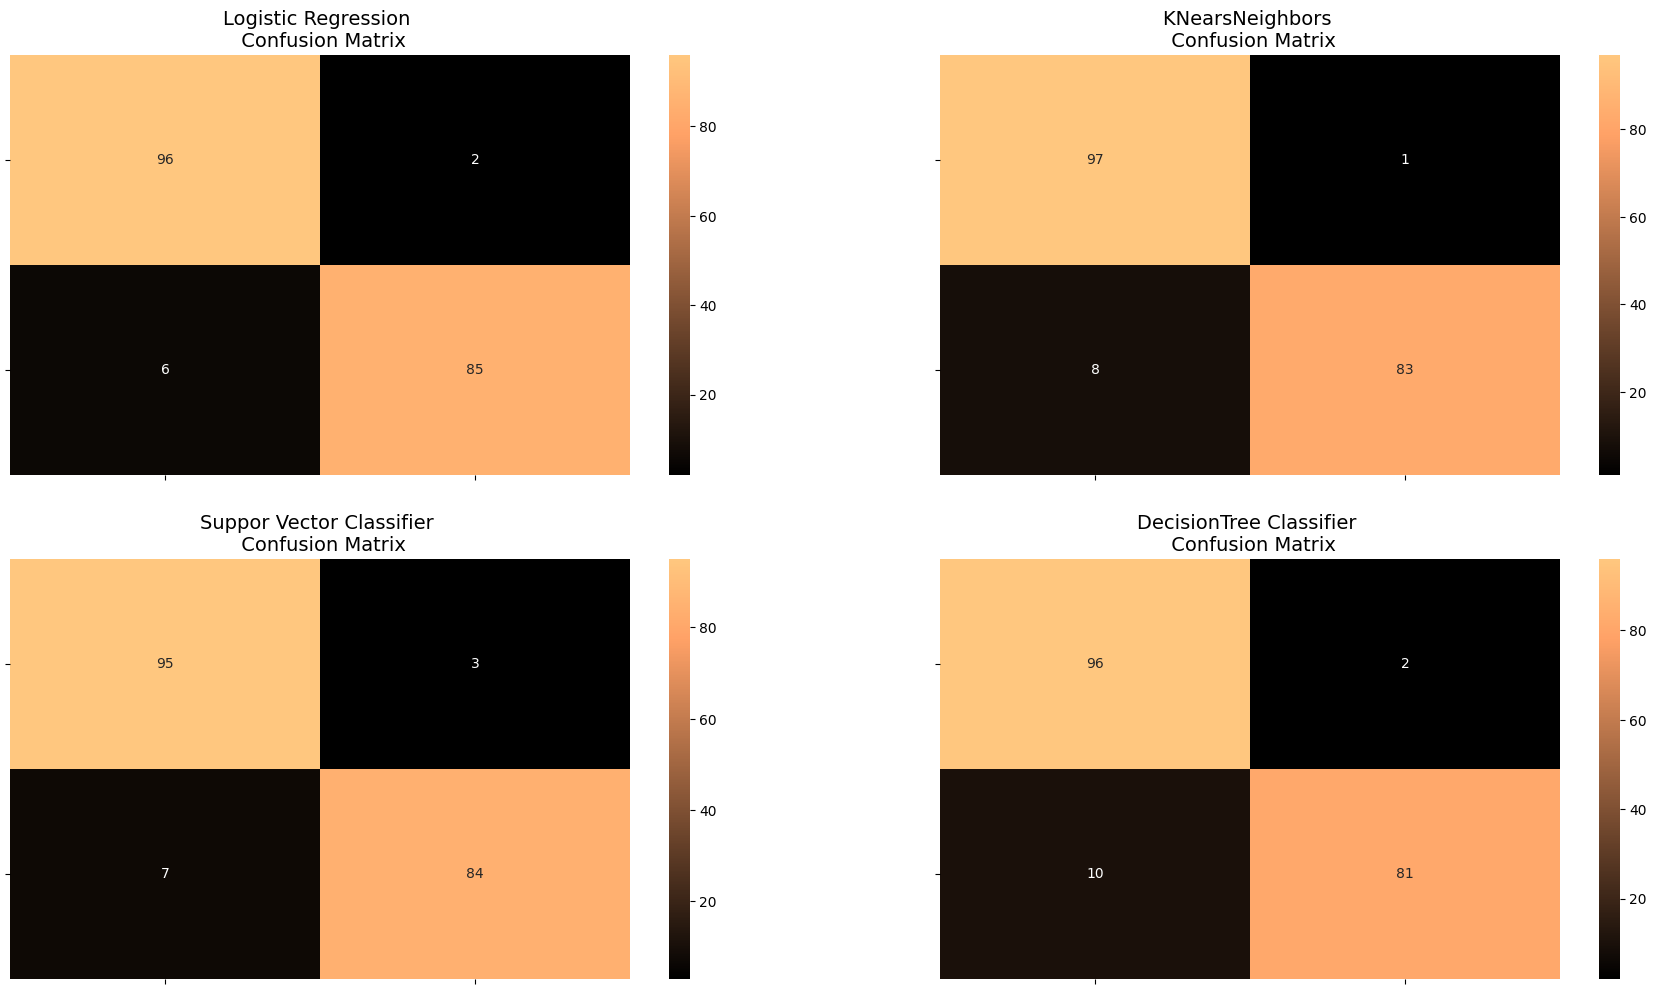

In [48]:
from sklearn.metrics import confusion_matrix

# Logistic Regression fitted using SMOTE technique
y_pred_log_reg = log_reg_sm.predict(X_test)

# Other models fitted with UnderSampling
y_pred_knear = knears_neighbors.predict(X_test)
y_pred_svc = svc.predict(X_test)
y_pred_tree = tree_clf.predict(X_test)


log_reg_cf = confusion_matrix(y_test, y_pred_log_reg)
kneighbors_cf = confusion_matrix(y_test, y_pred_knear)
svc_cf = confusion_matrix(y_test, y_pred_svc)
tree_cf = confusion_matrix(y_test, y_pred_tree)

fig, ax = plt.subplots(2, 2,figsize=(22,12))


sns.heatmap(log_reg_cf, ax=ax[0][0], annot=True, cmap=plt.cm.copper)
ax[0, 0].set_title("Logistic Regression \n Confusion Matrix", fontsize=14)
ax[0, 0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0, 0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(kneighbors_cf, ax=ax[0][1], annot=True, cmap=plt.cm.copper)
ax[0][1].set_title("KNearsNeighbors \n Confusion Matrix", fontsize=14)
ax[0][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0][1].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(svc_cf, ax=ax[1][0], annot=True, cmap=plt.cm.copper)
ax[1][0].set_title("Suppor Vector Classifier \n Confusion Matrix", fontsize=14)
ax[1][0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(tree_cf, ax=ax[1][1], annot=True, cmap=plt.cm.copper)
ax[1][1].set_title("DecisionTree Classifier \n Confusion Matrix", fontsize=14)
ax[1][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][1].set_yticklabels(['', ''], fontsize=14, rotation=360)


plt.show()

In [49]:
from sklearn.metrics import classification_report


print('Logistic Regression:')
print(classification_report(y_test, y_pred_log_reg))
print('KNears Neighbors:')
print(classification_report(y_test, y_pred_knear))
print('Support Vector Classifier:')
print(classification_report(y_test, y_pred_svc))
print('Support Vector Classifier:')
print(classification_report(y_test, y_pred_tree))

Logistic Regression:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96        98
           1       0.98      0.93      0.96        91

    accuracy                           0.96       189
   macro avg       0.96      0.96      0.96       189
weighted avg       0.96      0.96      0.96       189

KNears Neighbors:
              precision    recall  f1-score   support

           0       0.92      0.99      0.96        98
           1       0.99      0.91      0.95        91

    accuracy                           0.95       189
   macro avg       0.96      0.95      0.95       189
weighted avg       0.95      0.95      0.95       189

Support Vector Classifier:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95        98
           1       0.97      0.92      0.94        91

    accuracy                           0.95       189
   macro avg       0.95      0.95      0.95       189
weighted

In [50]:
# Final Score in the test set of logistic regression
from sklearn.metrics import accuracy_score

# Logistic Regression with Under-Sampling
y_pred = log_reg.predict(X_test)
undersample_score = accuracy_score(y_test, y_pred)

# Logistic Regression with SMOTE Technique (Better accuracy with SMOTE t)
y_pred_sm = best_est.predict(original_Xtest)
oversample_score = accuracy_score(original_ytest, y_pred_sm)

d = {'Technique': ['Random UnderSampling', 'Oversampling (SMOTE)'], 'Score': [undersample_score, oversample_score]}
final_df = pd.DataFrame(data=d)

# Move column
score = final_df['Score']
final_df.drop('Score', axis=1, inplace=True)
final_df.insert(1, 'Score', score)

# Note how high is accuracy score it can be misleading! 
final_df

,Technique,Score
0,Random UnderSampling,0.957672
1,Oversampling (SMOTE),0.979495


## 🧠 Neural Networks: Undersampling vs Oversampling (SMOTE)

In this section, we test a **simple neural network** (1 hidden layer) to compare how well it performs on the **random undersampled** vs **SMOTE-oversampled** datasets in detecting both fraud and non-fraud transactions.

---

### 🎯 Main Goal

We aim to evaluate whether the neural network can accurately classify **both** fraud and non-fraud cases — not just fraud.  
💡 Misclassifying legitimate transactions as fraud can cause customer frustration (e.g., blocked cards), so high precision on *non-fraud* is equally important.

---

### 📊 Confusion Matrix Refresher

- **🟩 Upper Left (True Negative)**: Correctly classified **No Fraud**
- **🟥 Upper Right (False Positive)**: Predicted **Fraud**, but it was **No Fraud**
- **🟨 Lower Left (False Negative)**: Predicted **No Fraud**, but it was **Fraud**
- **🟦 Lower Right (True Positive)**: Correctly classified **Fraud**

---

### 📝 Summary (Keras Model & Settings)

- **📂 Datasets Used**: Both the **random undersampled** and **SMOTE-oversampled** sets, evaluated on the **original test set**.
- **🧩 Neural Network Architecture**:
  - 1 input layer (features + bias)
  - 1 hidden layer with **32 neurons**
  - 1 output layer (binary: 0 = No Fraud, 1 = Fraud)
- **⚙️ Settings**:
  - **Learning Rate**: `0.001`
  - **Optimizer**: `Adam`
  - **Activation Function**: `ReLU`
  - **Loss Function**: `Sparse Categorical Crossentropy` (chooses the class with the highest predicted probability)

We’ll now evaluate which version (undersampling or oversampling) helps the neural network perform best in real fraud detection scenarios.


In [51]:
import keras
from keras import backend as K
from keras.models import Sequential
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from keras.layers import Activation
#from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

n_inputs = X_train.shape[1]

undersample_model = Sequential([
    Dense(n_inputs, input_shape=(n_inputs, ), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])

In [52]:
undersample_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 30)             │           930 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │           992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,988 (7.77 KB)

 Trainable params: 1,988 (7.77 KB)

 Non-trainable params: 0 (0.00 B)

In [53]:
from tensorflow.keras.optimizers import Adam

undersample_model.compile(optimizer=Adam(learning_rate=0.001), 
                          loss='sparse_categorical_crossentropy', 
                          metrics=['accuracy'])

In [54]:
undersample_model.fit(X_train, y_train, validation_split=0.2, batch_size=25, epochs=20, shuffle=True, verbose=2)

Epoch 1/20
25/25 - 1s - 36ms/step - accuracy: 0.7202 - loss: 0.4652 - val_accuracy: 0.8487 - val_loss: 0.3683
Epoch 2/20
25/25 - 0s - 4ms/step - accuracy: 0.8990 - loss: 0.3423 - val_accuracy: 0.9013 - val_loss: 0.3059
Epoch 3/20
25/25 - 0s - 4ms/step - accuracy: 0.9189 - loss: 0.2810 - val_accuracy: 0.9342 - val_loss: 0.2584
Epoch 4/20
25/25 - 0s - 4ms/step - accuracy: 0.9205 - loss: 0.2374 - val_accuracy: 0.9408 - val_loss: 0.2240
Epoch 5/20
25/25 - 0s - 3ms/step - accuracy: 0.9189 - loss: 0.2070 - val_accuracy: 0.9474 - val_loss: 0.1979
Epoch 6/20
25/25 - 0s - 3ms/step - accuracy: 0.9222 - loss: 0.1848 - val_accuracy: 0.9539 - val_loss: 0.1784
Epoch 7/20
25/25 - 0s - 3ms/step - accuracy: 0.9272 - loss: 0.1705 - val_accuracy: 0.9539 - val_loss: 0.1648
Epoch 8/20
25/25 - 0s - 3ms/step - accuracy: 0.9321 - loss: 0.1559 - val_accuracy: 0.9539 - val_loss: 0.1597
Epoch 9/20
25/25 - 0s - 3ms/step - accuracy: 0.9421 - loss: 0.1469 - val_accuracy: 0.9474 - val_loss: 0.1559
Epoch 10/20
25/25 

In [55]:
undersample_predictions = undersample_model.predict(original_Xtest, batch_size=200, verbose=0)

In [56]:
import numpy as np

pred_probs = undersample_model.predict(original_Xtest, batch_size=200, verbose=0)
undersample_fraud_predictions = np.argmax(pred_probs, axis=1)


In [57]:
import itertools

# Create a confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=14)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[54612  2251]
 [    8    90]]
Confusion matrix, without normalization
[[56863     0]
 [    0    98]]


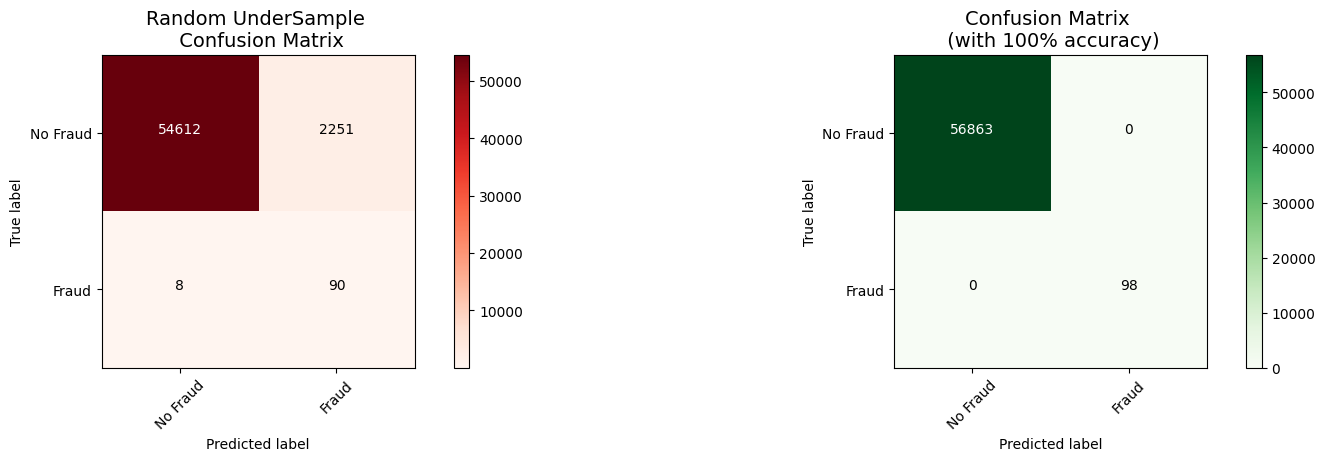

In [58]:
undersample_cm = confusion_matrix(original_ytest, undersample_fraud_predictions)
actual_cm = confusion_matrix(original_ytest, original_ytest)
labels = ['No Fraud', 'Fraud']

fig = plt.figure(figsize=(16,8))
fig.add_subplot(221)
plot_confusion_matrix(undersample_cm, labels, title="Random UnderSample \n Confusion Matrix", cmap=plt.cm.Reds)
fig.add_subplot(222)
plot_confusion_matrix(actual_cm, labels, title="Confusion Matrix \n (with 100% accuracy)", cmap=plt.cm.Greens)

### 🤖 Keras || OverSampling (SMOTE)

In [59]:
n_inputs = Xsm_train.shape[1]

oversample_model = Sequential([
    Dense(n_inputs, input_shape=(n_inputs, ), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])

In [60]:
from tensorflow.keras.optimizers import Adam

oversample_model.compile(
    optimizer=Adam(learning_rate=0.001), 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [61]:
oversample_model.fit(Xsm_train, ysm_train, validation_split=0.2, batch_size=300, epochs=20, shuffle=True, verbose=2)

Epoch 1/20
1214/1214 - 2s - 2ms/step - accuracy: 0.9715 - loss: 0.0730 - val_accuracy: 0.9899 - val_loss: 0.0329
Epoch 2/20
1214/1214 - 2s - 1ms/step - accuracy: 0.9957 - loss: 0.0168 - val_accuracy: 0.9981 - val_loss: 0.0173
Epoch 3/20
1214/1214 - 1s - 1ms/step - accuracy: 0.9982 - loss: 0.0086 - val_accuracy: 1.0000 - val_loss: 0.0056
Epoch 4/20
1214/1214 - 1s - 1ms/step - accuracy: 0.9988 - loss: 0.0059 - val_accuracy: 1.0000 - val_loss: 0.0023
Epoch 5/20
1214/1214 - 1s - 1ms/step - accuracy: 0.9990 - loss: 0.0046 - val_accuracy: 1.0000 - val_loss: 0.0024
Epoch 6/20
1214/1214 - 1s - 1ms/step - accuracy: 0.9993 - loss: 0.0037 - val_accuracy: 1.0000 - val_loss: 0.0017
Epoch 7/20
1214/1214 - 1s - 1ms/step - accuracy: 0.9994 - loss: 0.0031 - val_accuracy: 1.0000 - val_loss: 0.0016
Epoch 8/20
1214/1214 - 1s - 1ms/step - accuracy: 0.9995 - loss: 0.0027 - val_accuracy: 1.0000 - val_loss: 0.0012
Epoch 9/20
1214/1214 - 2s - 1ms/step - accuracy: 0.9995 - loss: 0.0024 - val_accuracy: 0.9998 - 

In [62]:
oversample_predictions = oversample_model.predict(original_Xtest, batch_size=200, verbose=0)

In [63]:
import numpy as np

oversample_pred_probs = oversample_model.predict(original_Xtest, batch_size=200, verbose=0)
oversample_fraud_predictions = np.argmax(oversample_pred_probs, axis=1)

Confusion matrix, without normalization
[[56816    47]
 [   20    78]]
Confusion matrix, without normalization
[[56863     0]
 [    0    98]]


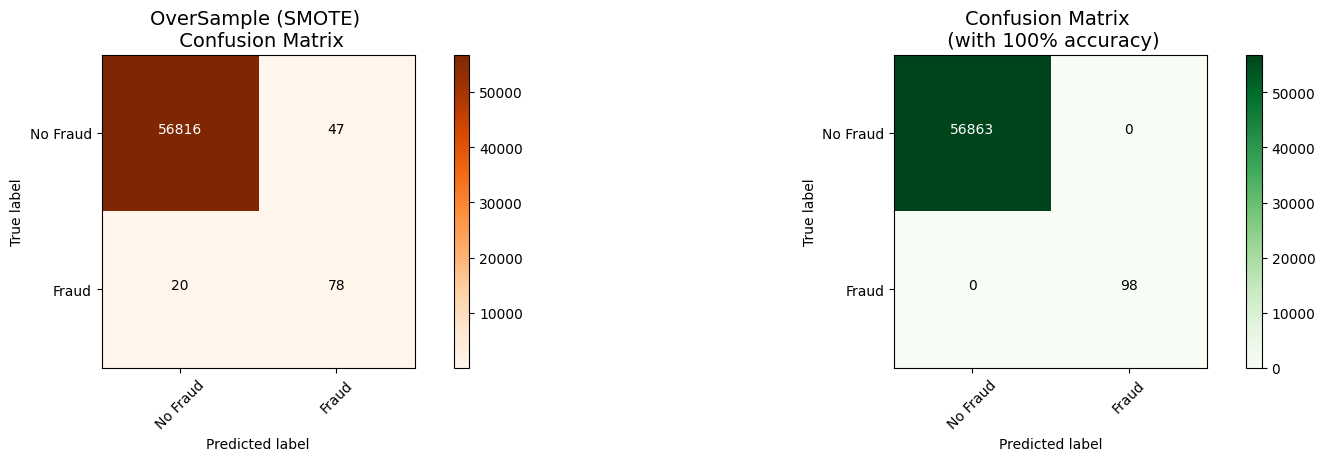

In [64]:
oversample_smote = confusion_matrix(original_ytest, oversample_fraud_predictions)
actual_cm = confusion_matrix(original_ytest, original_ytest)
labels = ['No Fraud', 'Fraud']

fig = plt.figure(figsize=(16,8))
fig.add_subplot(221)
plot_confusion_matrix(oversample_smote, labels, title="OverSample (SMOTE) \n Confusion Matrix", cmap=plt.cm.Oranges)
fig.add_subplot(222)
plot_confusion_matrix(actual_cm, labels, title="Confusion Matrix \n (with 100% accuracy)", cmap=plt.cm.Greens)

## ✅ Conclusion

Applying **SMOTE** helped balance our imbalanced dataset (more `"No Fraud"` than `"Fraud"` cases). However, some key insights emerged:

- 🤖 The neural network on the **oversampled dataset** sometimes detects fewer fraud cases correctly compared to the **undersampled dataset**.
- ⚠️ Important caveat: **Outlier removal** was applied only to the **undersampled** data, not the oversampled one.
- 🔁 On the **undersampled dataset**, the model tends to misclassify many `"No Fraud"` transactions as `"Fraud"` — leading to potential issues like:
  - ❌ False alarms
  - 🚫 Blocked cards for legitimate purchases
  - 📞 Increased customer complaints
  - 😠 Lower customer satisfaction

### 🔜 Next Steps:
- Apply **outlier removal** to the **oversampled** dataset.
- Evaluate whether it improves test accuracy and fraud detection performance.

> 💡 **Note**: Due to random data shuffling, model predictions and accuracy may vary slightly. The main focus remains: improving classification of both `"Fraud"` and `"No Fraud"` transactions.